# Metrics of the retrieved data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Wandavision metrics with VADER

Here we load the metrrics that we have been collecting episode by episode, and we have put together manually to be able to compute the following metrics. The dataframe is quiet self explanatory, but the main data we can observe is: 


*   Compound mean and variance
*   Number of positive, negative and neutral tweets
*   Mean and variance of the number of positive words per tweet



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/Shareddrives/WebIntelligence/DATA/Twitter/WandaMet.csv')
df.set_index('Episode', inplace=True, drop=True)
df.head(7)

num_tweets  ...  #pos_words/tweet variance
Episode              ...                           
Ep3             100  ...                      1.757
Ep4            1000  ...                      0.542
Ep5            2000  ...                      0.828
Ep6            3000  ...                      0.663
Ep7            3000  ...                      0.716
Ep8            3000  ...                      0.667
Ep9            3000  ...                      1.033

[7 rows x 8 columns]

Taking into account the mean compound value of each chapter, we plot the mean and also the variance the values of all the retrieved tweets per episode. The variance is important, as could show up discrepancy in Twitter opinions. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


<Figure size 1080x648 with 0 Axes>

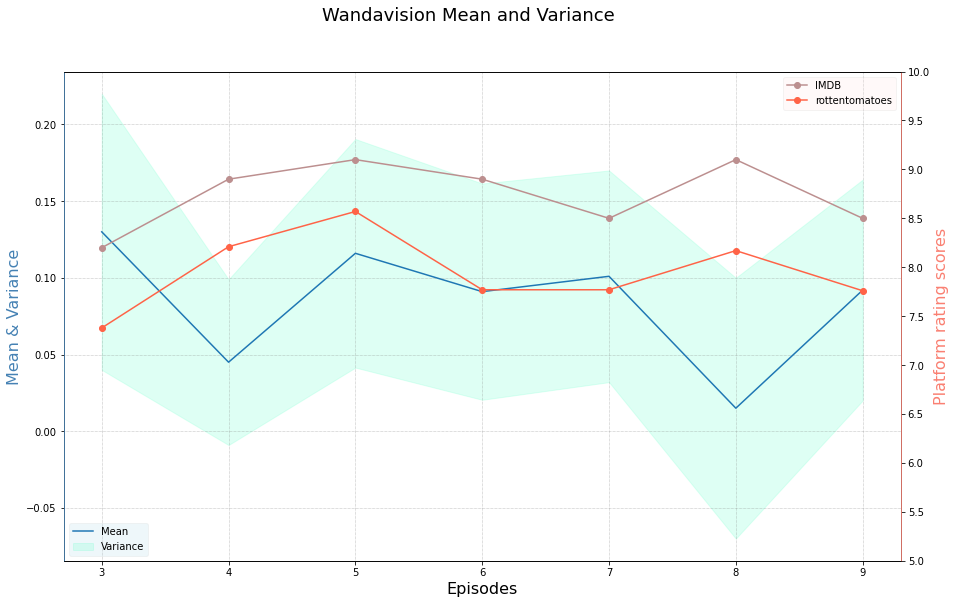

In [10]:
labels = ['Ep3','Ep4','Ep5','Ep6','Ep7','Ep8', 'Ep9']

fig = plt.figure(figsize = (15,9))
y = df['compound mean'].tolist()
var = df['compound var'].tolist()
x = np.arange(3,10)
var_array = np.array(var)
error = var_array/2
imdb = [8.2,8.9,9.1,8.9,8.5,9.1,8.5]
rot = [7.38,8.21,8.57,7.77,7.77,8.17,7.76]
rating = [8.2,8.9,9.2,8.9,8.5,9.1,8.6]

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(15)
# make a plot
ax.plot(x, y, label='Mean')
ax.fill_between(x, y-error, y+error, color='aquamarine', alpha=0.25, label='Variance')
# set x-axis label
ax.set_xlabel('Episodes',fontsize=16)
# set y-axis label
ax.set_ylabel('Mean & Variance',color='steelblue',fontsize=16)
fig.suptitle('Wandavision Mean and Variance',fontsize=18)
ax.grid(linestyle='dotted', linewidth='0.5', color='grey')
ax.set_xticks([3,4,5,6,7,8,9], labels)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, imdb,color="rosybrown",marker="o",label='IMDB')
ax2.plot(x, rot,color="tomato",marker="o", label='rottentomatoes')
ax2.set_ylabel("Platform rating scores",color="salmon",fontsize=16)
ax2.set_yticks(np.arange(5,10.5,0.5))

ax.legend(loc = 'lower left',facecolor= 'lightblue',framealpha=0.2)
ax2.legend(loc = 'upper right',facecolor= 'mistyrose',framealpha=0.2)
ax2.spines["left"].set_color("steelblue")
ax2.spines["right"].set_color("salmon")
plt.show()

Here we observe 2 things: the first one is the mean and the variance of the compound value along the Wandavision episodes. The second thing we observe are ratings in two different sites, IMDB and rottentomatoes. It is important to have in mind that the ranks in IMDB are quite biased by inner filters they apply to the comments, se we cannot conclude anything from this rank due to the opacity of such filters. 

It is easy to see that they both differ from the mean extracted from Twitter, specially in the episode 4 and 8, where there is a complete discrepancy between the twitter mean and the ratings. In fact, for these two episodes, both rating are even out of the variance area. Also the third one differs, but not so dramatically. 

Now we analyze the number of tweets per each "emotion" in each chapter.

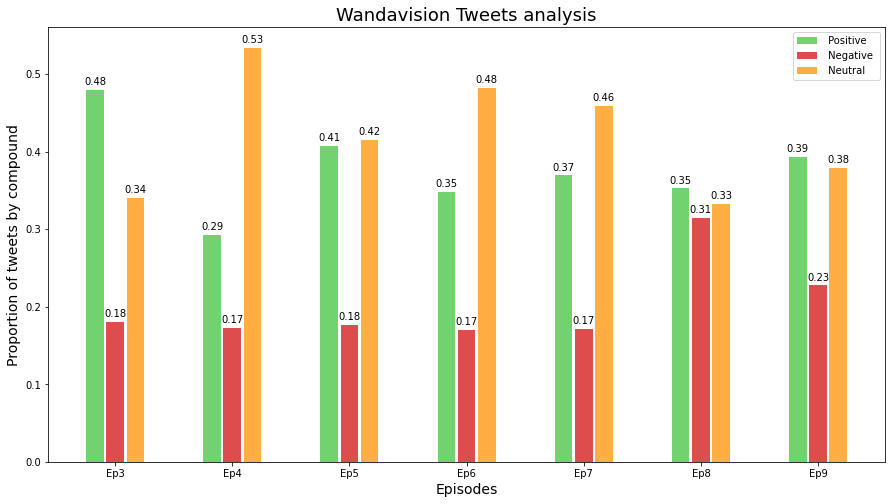

In [ ]:
labels = ['Ep3','Ep4','Ep5','Ep6','Ep7','Ep8', 'Ep9']
x = np.arange(len(labels))
num_tweets = df['num_tweets'].to_numpy()
# pos_tweets is the real number
pos_tweets = df['#tweets Pos'].to_numpy()
# pos_prop is the proportion (pos_tweets/all_tweets)
pos_prop = [i / j for i, j in zip(pos_tweets, num_tweets)]

neg_tweets = df['#tweets Neg'].to_numpy()
neg_prop = [i / j for i, j in zip(neg_tweets, num_tweets)]

neu_tweets = df['#tweets Neu'].to_numpy()
neu_prop = [i / j for i, j in zip(neu_tweets, num_tweets)]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
width = 0.15
pos_bar = ax.bar(x - width*1.15, pos_prop, width, color='#72D26F',label=' Positive ')
neg_bar = ax.bar(x ,  neg_prop,  width, color='#DD4D4D', label=' Negative ')
neu_bar = ax.bar(x + width*1.15,  neu_prop,  width, color='#FFAE42', label=' Neutral ')
ax.set_ylabel('Proportion of tweets by compound', fontsize=14)
ax.set_xlabel('Episodes', fontsize=14)
ax.set_title('Wandavision Tweets analysis', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(float(round(height,2))),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(pos_bar)
autolabel(neg_bar)
autolabel(neu_bar)